![](https://www.gannett-cdn.com/-mm-/0b146ca359d26300e1d6a8b6a2d86ce731de39c2/c=10-0-630-466/local/-/media/2016/12/10/INGroup/Indianapolis/636169619660823711-121116.jpg?quality=50&width=640)

The spread of misinformation on social media platforms is an ever-growing problem. Organizations, politicians, individuals looking for personal gain and even certain news media outlets engage in propagating fake news to sway people's decisions as well as distorting events to fit a bias or prejudice. 

The degree of authenticity of the news posted online cannot be definitively measured, since the manual classification of news is tedious and time-consuming and is also subject to bias. 

To tackle the growing problem, detection, classification and mitigation tools are a need of the hour.

# Methodology
The categories, bs (i.e. bullshit), junksci(i.e. junk science), hate, fake, conspiracy, bias, satire and state declare the
category under which untrustworthy or false news fall under. 

The first step, which is text preprocessing was performed using the following:
* Taking care of null/missing values 
* Transforming categorical data with the help of label encoders 
* Uppercase to lowercase 
* Number removal 
* Tokenization 
* Stop Word Removal, Stemming and Lemmatization (with POS tagging) using the Natural Language Toolkit Library 

For feature engineering, the TF-IDF technique is used. 
This processed and embedded text is provided as an input to Machine learning models, where the data is made to fit the model, to get a prediction as an output. 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/source-based-news-classification/news_articles.csv


# Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import cufflinks as cf
import plotly
import plotly.express as px

from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from datetime import datetime
from sklearn.feature_extraction.text import CountVectorizer
from pandas import DataFrame
from collections import OrderedDict 

# Reading the csv file

In [3]:
df = pd.read_csv(r'../input/source-based-news-classification/news_articles.csv', encoding="latin", index_col=0)
df = df.dropna()
df.count()

published                  2045
title                      2045
text                       2045
language                   2045
site_url                   2045
main_img_url               2045
type                       2045
label                      2045
title_without_stopwords    2045
text_without_stopwords     2045
hasImage                   2045
dtype: int64

In [4]:
df.head(5)

,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
author,,,,,,,,,,,
Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0
reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0
Barracuda Brigade,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0
Fed Up,2016-11-01T05:22:00.000+02:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1.0
Fed Up,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...,1.0


In [5]:
df['type'].unique()

array(['bias', 'conspiracy', 'fake', 'bs', 'satire', 'hate', 'junksci',
       'state'], dtype=object)

In [6]:
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

# Distrubution of types of articles

In [7]:
df['type'].iplot(kind='hist',
    bins=100,
    xTitle='type',
    linecolor='black',
    yTitle='count',
    title='Types of Articles Distribution')

# Top 20 words in articles and their frequency 

In [8]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(df['text_without_stopwords'], 20)
common_words_df = DataFrame (common_words,columns=['word','freq'])
fig = px.bar(common_words_df, x='word', y='freq',title='Top 20 words in articles and their frequency')
fig.show()

# WordCloud of articles

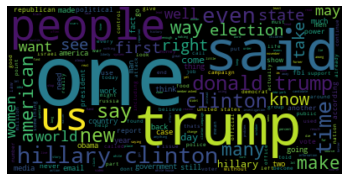

In [9]:
wc = WordCloud()
wc.generate(' '.join(df['text_without_stopwords']))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

# Articles including images vs Label

In [10]:
fig = px.bar(df, x='hasImage', y='label',title='Articles including images vs Label')
fig.show()

In [11]:
df['site_url'].unique()

array(['100percentfedup.com', '21stcenturywire.com', 'abcnews.com.co',
       'abeldanger.net', 'abovetopsecret.com', 'activistpost.com',
       'addictinginfo.org', 'adobochronicles.com', 'ahtribune.com',
       'allnewspipeline.com', 'americannews.com',
       'americasfreedomfighters.com', 'amren.com', 'amtvmedia.com',
       'awdnews.com', 'barenakedislam.com', 'clickhole.com',
       'coasttocoastam.com', 'corbettreport.com', 'countercurrents.org',
       'counterpunch.org', 'dailywire.com', 'darkmoon.me',
       'davidduke.com', 'davidstockmanscontracorner.com',
       'davidwolfe.com', 'dcclothesline.com', 'defenddemocracy.press',
       'dennismichaellynch.com', 'departed.co', 'der-postillon.com',
       'fromthetrenchesworldreport.com', 'frontpagemag.com',
       'galacticconnection.com', 'globalresearch.ca', 'infowars.com',
       'intrepidreport.com', 'legorafi.fr', 'madworldnews.com',
       'naturalnews.com', 'newstarget.com', 'politicususa.com',
       'presstv.com', 'pre

In [12]:
type_label = {'Real': 0, 'Fake': 1}
df_sources = df[['site_url','label']]
df_sources.label = [type_label[item] for item in df_sources.label] 

In [13]:
val_real=[]
val_fake=[]

for i,row in df_sources.iterrows():
    val = row['site_url']
    if row['label'] == 0:
        val_real.append(val)
    elif row['label']== 1:
        val_fake.append(val)

> # Websites publishing real news

In [14]:
uniqueValues_real = list(OrderedDict.fromkeys(val_real)) 
uniqueValues_real

['100percentfedup.com',
 'addictinginfo.org',
 'dailywire.com',
 'davidduke.com',
 'fromthetrenchesworldreport.com',
 'frontpagemag.com',
 'newstarget.com',
 'politicususa.com',
 'presstv.com',
 'presstv.ir',
 'prisonplanet.com',
 'proudemocrat.com',
 'redstatewatcher.com',
 'returnofkings.com',
 'washingtonsblog.com',
 'westernjournalism.com',
 'whydontyoutrythis.com',
 'wnd.com']

# Websites publishing fake news

In [15]:
uniqueValues_fake = list(OrderedDict.fromkeys(val_fake)) 
uniqueValues_fake

['21stcenturywire.com',
 'abcnews.com.co',
 'abeldanger.net',
 'abovetopsecret.com',
 'activistpost.com',
 'adobochronicles.com',
 'ahtribune.com',
 'allnewspipeline.com',
 'americannews.com',
 'americasfreedomfighters.com',
 'amren.com',
 'amtvmedia.com',
 'awdnews.com',
 'barenakedislam.com',
 'clickhole.com',
 'coasttocoastam.com',
 'corbettreport.com',
 'countercurrents.org',
 'counterpunch.org',
 'darkmoon.me',
 'davidduke.com',
 'davidstockmanscontracorner.com',
 'davidwolfe.com',
 'dcclothesline.com',
 'defenddemocracy.press',
 'dennismichaellynch.com',
 'departed.co',
 'der-postillon.com',
 'fromthetrenchesworldreport.com',
 'frontpagemag.com',
 'galacticconnection.com',
 'globalresearch.ca',
 'infowars.com',
 'intrepidreport.com',
 'legorafi.fr',
 'madworldnews.com',
 'naturalnews.com',
 'newstarget.com',
 'presstv.ir',
 'prisonplanet.com',
 'projectveritas.com',
 'returnofkings.com',
 'shiftfrequency.com',
 'thedailysheeple.com',
 'theeconomiccollapseblog.com',
 'thefreethoug

# Websites publishing both real and fake news

In [16]:
real_set = set(uniqueValues_real) 
fake_set = set(uniqueValues_fake) 
  
print(real_set & fake_set)

{'frontpagemag.com', 'washingtonsblog.com', 'newstarget.com', 'prisonplanet.com', 'fromthetrenchesworldreport.com', 'westernjournalism.com', 'returnofkings.com', 'presstv.ir', 'davidduke.com'}


In [17]:
type1 = {'bias': 0, 'conspiracy': 1,'fake': 2,'bs': 3,'satire': 4, 'hate': 5,'junksci': 6, 'state': 7}
df.type = [type1[item] for item in df.type] 

In [18]:
def plot_bar(df, feat_x, feat_y, normalize=True):
    """ Plot with vertical bars of the requested dataframe and features"""
    
    ct = pd.crosstab(df[feat_x], df[feat_y])
    if normalize == True:
        ct = ct.div(ct.sum(axis=1), axis=0)
    return ct.plot(kind='bar', stacked=True)

# Label vs Type

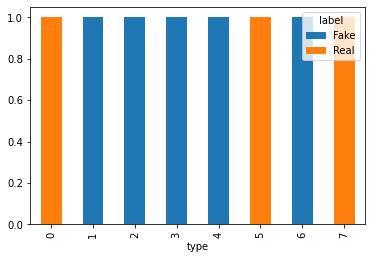

In [19]:
plot_bar(df,'type' , 'label')
plt.show()

# Shuffling values

In [20]:
df1 = df.sample(frac=1)
df1.head()

,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
author,,,,,,,,,,,
Anonymous,2016-10-27T21:50:00.000+03:00,no title,georg soros the good oil httpmailstarnetsoros...,english,abeldanger.net,No Image URL,3,Fake,title,georg soros good oil httpmailstarnetsoroshtml ...,0.0
antonw,2016-11-08T00:27:00.000+02:00,no title,shares\n \nusa usa usa they chanted togethe...,english,ahtribune.com,http://ahtribune.com/images/media/School_Priva...,3,Fake,title,shares usa usa usa chanted together hilton bal...,1.0
Activist Post,2016-11-04T17:36:57.750+02:00,wikileaks revelations leave the federal empero...,by brandon turbeville as the floodwaters reced...,english,activistpost.com,No Image URL,1,Fake,wikileaks revelations leave federal emperor we...,brandon turbeville floodwaters receded nichols...,0.0
No Author,2016-10-27T01:27:51.124+03:00,iran finland sign mous in tehran,iraqi forces score major gains south of mosul ...,english,presstv.ir,http://media.presstv.com/photo/20161026/1aa26b...,7,Real,outrage mays real idea brexit goldman sachs sp...,politics emergency crews responding us republi...,1.0
No Author,2016-11-25T15:28:38.752+02:00,jy crois encore par alain juppÃ© en train de...,zika a masterpiece of public mind control \nsa...,english,madworldnews.com,http://madworldnews.com/wp-content/uploads/201...,6,Fake,california becomes second state raise legal sm...,americas shrimp imports injected dangerous che...,1.0


# Training and Testing

In [21]:
y = df1.type

x = df1.loc[:,['site_url','text_without_stopwords']]
x['source'] = x["site_url"].astype(str) +" "+ x["text_without_stopwords"] 
x = x.drop(['site_url','text_without_stopwords'],axis=1)
x = x.source

Right after preprocessing, the output is a corpus of raw texts that are stripped of stopwords, stemmed and lemmatized. 

In order to get a sparse matrix of TF/IDF values, the following steps are taken:
* Tokenization of texts
* Counting of the tokens and
* Transforming the raw tokens into TF/IDF values

The above steps are done with the help of the TfidfVectorizer, which transforms text to feature vectors that can be used
as input to estimators/classifiers.

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

tfidf_vect = TfidfVectorizer(stop_words = 'english')
tfidf_train = tfidf_vect.fit_transform(x_train)
tfidf_test = tfidf_vect.transform(x_test)
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vect.get_feature_names())

In [23]:
tfidf_vect

TfidfVectorizer(stop_words='english')

In [24]:
tfidf_train.shape

(1431, 38875)

AdaBoost works in iterations with a base classifier to ensure accurate predictions of unusual observations.

It works in iterations and within each iteration, incorrect observations are given a higher probability for classification for the next iteration. 

The AdaBoost implemented here has a Decision Tree Classifier as the base classifier with a max depth of the tree being 10.

In [25]:
Adab = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10),n_estimators=5,random_state=1)
Adab.fit(tfidf_train, y_train)
y_pred3 = Adab.predict(tfidf_test)
ABscore = metrics.accuracy_score(y_test,y_pred3)
print("accuracy: %0.3f" %ABscore)

accuracy: 0.966


In [26]:
Rando = RandomForestClassifier(n_estimators=100,random_state=0)
Rando.fit(tfidf_train,y_train)
y_pred1 = Rando.predict(tfidf_test)
RFscore = metrics.accuracy_score(y_test,y_pred1)
print("accuracy:  %0.3f" %RFscore)

accuracy:  0.906
